In [ ]:
#pip install seaborn scikit-learn

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
DATA_FOLDER = "data"
os.getcwd()

'/Users/alavar/dev/tietoevery_norway/gymanalyses'

## Task 1 : Hourly Gym Usage

In [4]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
gym_full_path = os.path.abspath(os.path.join(DATA_FOLDER,'hietaniemi-gym-data.csv'))
df_raw = pd.read_csv(gym_full_path, parse_dates=['time'], date_parser=lambda x: pd.to_datetime(x, utc=True))
df = df_raw.copy()

In [5]:

df['time']=pd.to_datetime(df['time'])

df_hourly = df.resample('60min', on='time').sum().reset_index()


print(f'first 10 rows of hourly sampled data: ')
print(df_hourly.head(10))

first 10 rows of hourly sampled data: 
                       time  19  20  21  22  23  24  25  26
0 2020-04-24 00:00:00+00:00  12  12  12  12  12  12  12  12
1 2020-04-24 01:00:00+00:00  12  12  12  12  12  12  12  12
2 2020-04-24 02:00:00+00:00  12  12  12  14  12  13  12  13
3 2020-04-24 03:00:00+00:00  13  14  15  12  18  20  23  20
4 2020-04-24 04:00:00+00:00  24  15  23  24  19  25  30  28
5 2020-04-24 05:00:00+00:00  19  15  18  12  19  20  28  18
6 2020-04-24 06:00:00+00:00  36  28  34  25  28  30  30  34
7 2020-04-24 07:00:00+00:00  28  26  24  22  26  31  26  26
8 2020-04-24 08:00:00+00:00  32  25  25  21  34  30  44  33
9 2020-04-24 09:00:00+00:00  35  28  37  33  40  44  41  32


## Task 2: Data Quality
Perform the following quality checks on the data:
•	There are more than 50,000 rows in the dataset
•	There are records from between 2020-04-24 and 2021-05-11
•	All values in the numerical columns are positive
Use Pytest data quality library.

In [6]:
!pytest  task_2.py -v

============================= test session starts ==============================
platform darwin -- Python 3.9.16, pytest-7.2.1, pluggy-1.0.0 -- /Users/alavar/.pyenv/versions/3.9.16/bin/python3.9
cachedir: .pytest_cache
rootdir: /Users/alavar/dev/tietoevery_norway/gymanalyses
plugins: anyio-3.6.2
collected 4 items                                                              

task_2.py::test_check_number_of_rows PASSED                              [ 25%]
task_2.py::test_check_time_range_with_index PASSED                       [ 50%]
task_2.py::test_check_time_range_with_index_2 PASSED                     [ 75%]
task_2.py::test_check_numerical_values_positive PASSED                   [100%]

============================== 4 passed in 0.67s ===============================


## Task 3

Denote the processing dataset by df

In [7]:

df = df_raw.copy()


•	What was the most popular device during the tracking period measured by number of minutes used?

In [8]:
# most popular device
def max_usage_sensor(df):
    total_usage=[]
    for col in df.columns[1:-1]:
        total_usage.append({'sensor':col, 'usage_minutes': df[col].sum()})
    
    max_usage_minutes = max(total_usage, key=lambda x: x['usage_minutes'])
    max_usage_sensor = max_usage_minutes['sensor']
    return max_usage_sensor, max_usage_minutes['usage_minutes']


most_popular, max_minutes = max_usage_sensor(df)

print(f"Most popular device was {most_popular} with total {max_minutes} minutes")

Most popular device was 25 with total 182532 minutes


Did day (hour) impact overall popularity of the outdoor gym?


In [9]:
df_hour = df.copy()
df_hour['hour'] = df_hour['time'].dt.hour
df_hourly_agg= df_hour.groupby('hour').sum(numeric_only=True)
# calculate the sum of each row
df_hourly_agg['sum'] = df_hourly_agg.sum(axis=1)
most_popular_hour = df_hourly_agg['sum'].idxmax()

max_minutes= df_hourly_agg['sum'].max()
print()
print(f'Most populous hour was {most_popular_hour}:00 hrs with total {max_minutes} minutes spent')




Most populous hour was 15:00 hrs with total 77232 minutes spent


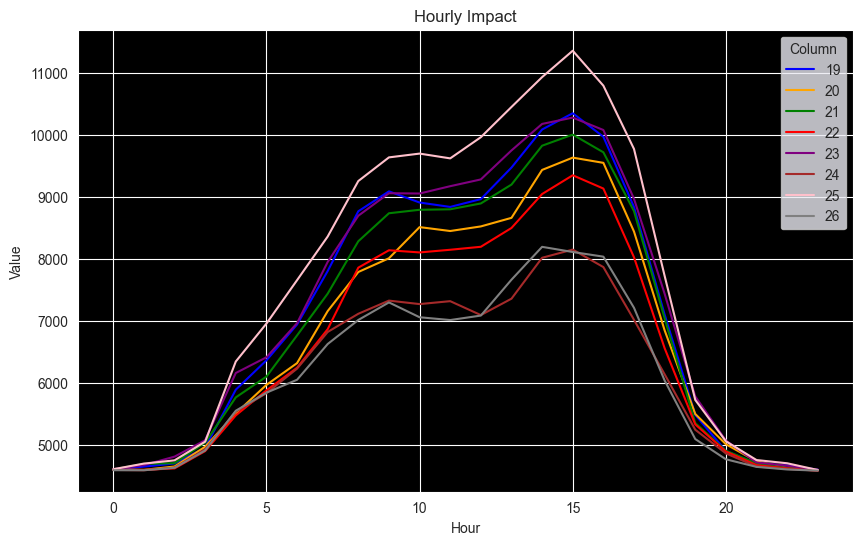

In [76]:
import matplotlib.pyplot as plt

def plot_data(data=df_hourly_agg):
    # Define a custom color palette
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    
    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot each column with matplotlib plot
    for i, column in enumerate(data.columns[:-1]):  # Exclude the 'sum' column
        ax.plot(data.index, data[column], label=column, color=colors[i % len(colors)])
    
    # Set title for the plot
    ax.set_title('Hourly Impact')
    
    # Set labels for x and y axes
    ax.set_xlabel('Hour')
    ax.set_ylabel('Value')
    
    # Add legend
    ax.legend(title='Column')
    plt.gca().set_facecolor('black')  # Set the background color to white

    # Show plot
    plt.show()

plot_data()

Did day (hour) impact overall popularity of the outdoor gym?

As you can see from the graphs, the hour as a very significant impact on gym usage, with 3'clock in the day being the most popular


•	Was the gym more popular overall on weekends (Saturday and Sunday) than on weekdays?

In [10]:
# avg weekday usage
def calculate_mean_usage(df):
    mean_usage={}
    for col in df.columns:
        mean_usage[col]=df[col].mean()
    return mean_usage  
df_weekly = df_hourly.copy()
df_weekly['weekday'] = df_weekly['time'].dt.strftime('%A')

weekday_usage = df_weekly.groupby('weekday').sum(numeric_only = True)


In [11]:
weekday_usage.head()

,19,20,21,22,23,24,25,26
weekday,,,,,,,,
Friday,24036,22470,23462,22263,24151,21351,25569,21091
Monday,25404,23750,24848,23098,25956,21488,27377,21636
Saturday,23667,22728,23279,21740,23804,20250,25096,20101
Sunday,24418,23625,24155,22905,24796,21252,25949,20924
Thursday,23866,22645,23499,22333,24385,20891,25727,20982


In [12]:

mean_usage = calculate_mean_usage(weekday_usage.T)

avg_wknd_usage = np.mean([mean_usage['Saturday'],mean_usage['Sunday']])
avg_wkday_usage = np.mean([v for k, v in mean_usage.items() if k not in ('Saturday', 'Sunday')])

print()
print(f'Avg weekday usage: {avg_wkday_usage.round(0)}, whereas avg weekend usage: {avg_wknd_usage.round(0)}, hence gym was not more popular on weekdays')


Avg weekday usage: 23534.0, whereas avg weekend usage: 23043.0, hence gym was not more popular on weekdays


## Task 4

Add the following new features to the dataset:
•	Weekday as number
•	Hour as number
•	Sum of minutes across all gym devices


In [13]:
def enrich_data(data, interval = 10):
    # add a new column with the weekday as a number
    data['weekday'] = data['time'].dt.weekday
    
    # add a new column with the hour as a number
    data['Hour'] = data['time'].dt.strftime('%H').astype(int)
    
    # Sum of minutes across all gym devices
    data['sum'] = data.drop(['time','weekday','Hour'], axis=1).sum(axis=1)
    

    print(f"{interval} min gym usage data with added columns")
    print(data.head(2))
    return data
    
gym_10_min = enrich_data(data=df_raw, interval = 10)
gym_60_min = enrich_data(data=df_hourly, interval = 60)



10 min gym usage data with added columns
                       time  19  20  21  22  23  24  25  26  weekday  Hour  \
0 2020-04-24 00:00:00+00:00   2   2   2   2   2   2   2   2        4     0   
1 2020-04-24 00:10:00+00:00   2   2   2   2   2   2   2   2        4     0   

   sum  
0   16  
1   16  
60 min gym usage data with added columns
                       time  19  20  21  22  23  24  25  26  weekday  Hour  \
0 2020-04-24 00:00:00+00:00  12  12  12  12  12  12  12  12        4     0   
1 2020-04-24 01:00:00+00:00  12  12  12  12  12  12  12  12        4     1   

   sum  
0   96  
1   96  


## Task 5



In this task we analyse the impact of weather on gym popularity.
In file “kaisaniemi-weather.csv” you will find hourly weather data from the closest measuring station in Helsinki for the same period as the gym usage data.

Join this dataset with the gym usage dataset, so that you have both the gym device usage statistics and weather observations for each hour. 

In [14]:

import pytz
def enrich_gym_with_weather(gym_60_min,weather_60_min_path = 'kaisaniemi-weather-data.csv'):
    tz = pytz.UTC    
    kaisaniemi_weather_data = pd.read_csv(os.path.join(DATA_FOLDER,weather_60_min_path))
    kaisaniemi_weather_data['timestring'] = kaisaniemi_weather_data.apply(lambda x: f"{x['Year']}-{x['Month']:02}-{x['Day']:02} {x['Hour']}", axis=1)
    # Localize the datetime column to the desired timezone
    kaisaniemi_weather_data['time'] = pd.to_datetime(kaisaniemi_weather_data['timestring']).dt.tz_localize(tz)
    merged_df = pd.merge(gym_60_min, kaisaniemi_weather_data.drop(columns='Hour'), on='time', how='inner')
    merged_df = merged_df.rename({"sum":"hourly_gym_usage"}, axis = 1)
    return merged_df

hourly_gym_and_weather = enrich_gym_with_weather(gym_60_min)


Then analyse the following:
•	Does temperature impact gym popularity?


In [15]:
hourly_gym_and_weather.head()

,time,19,20,21,22,23,24,25,26,weekday,Hour,hourly_gym_usage,Year,Month,Day,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC),timestring
0,2020-04-24 00:00:00+00:00,12,12,12,12,12,12,12,12,4,0,96,2020,4,24,UTC,0.0,0.0,6.2,2020-04-24 00:00
1,2020-04-24 01:00:00+00:00,12,12,12,12,12,12,12,12,4,1,96,2020,4,24,UTC,0.0,0.0,6.2,2020-04-24 01:00
2,2020-04-24 02:00:00+00:00,12,12,12,14,12,13,12,13,4,2,100,2020,4,24,UTC,0.0,0.0,5.1,2020-04-24 02:00
3,2020-04-24 03:00:00+00:00,13,14,15,12,18,20,23,20,4,3,135,2020,4,24,UTC,0.0,0.0,4.6,2020-04-24 03:00
4,2020-04-24 04:00:00+00:00,24,15,23,24,19,25,30,28,4,4,188,2020,4,24,UTC,0.0,0.0,4.7,2020-04-24 04:00


In [16]:

def correlation_between_vars(data,feature1 = 'Temperature (degC)',feature2 = "hourly_gym_usage"):
    corr_coeff = data[feature1].corr(data[feature2]).round(2)
    return corr_coeff
corr_coeff = correlation_between_vars(hourly_gym_and_weather)
print(f'Correlation coefficient between gym usage and air temperature: {corr_coeff}')


Correlation coefficient between gym usage and air temperature: 0.33


There is a weak positive correlation between the temperature and gym use.

•	What about precipitation?
NOTE: In this dataset, for precipitation and snow depth, value 0 means that there can have been some of either, whereas value -1 means that there really was no precipitation or snow depth. You should consider this in your analysis.

Correlation coefficient for snow depth:
                    Snow_No Snow  Snow_Snow Possible  Snow_Snow  \
Snow_No Snow            1.000000           -0.629220  -0.427402   
Snow_Snow Possible     -0.629220            1.000000  -0.433731   
Snow_Snow              -0.427402           -0.433731   1.000000   
hourly_gym_usage        0.109598            0.064338  -0.201894   

                    hourly_gym_usage  
Snow_No Snow                0.109598  
Snow_Snow Possible          0.064338  
Snow_Snow                  -0.201894  
hourly_gym_usage            1.000000  


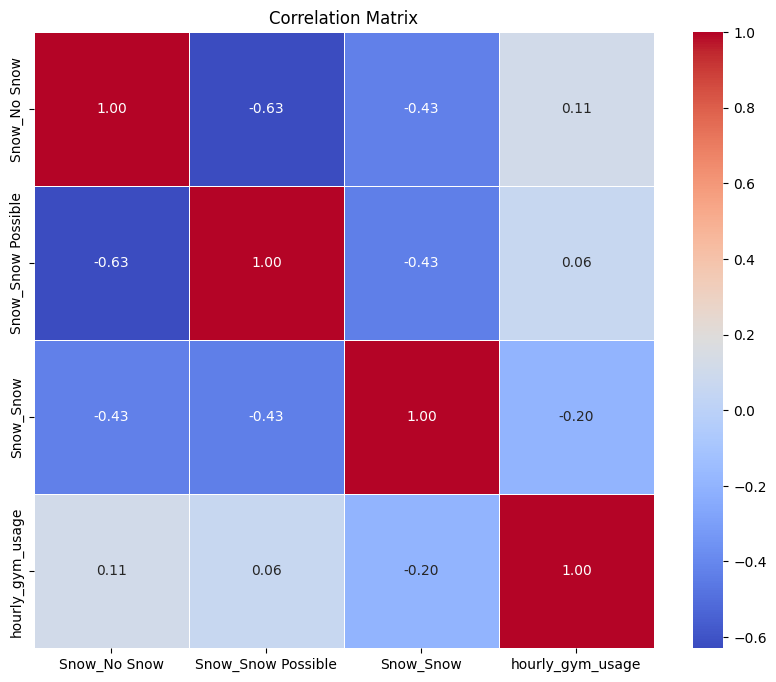

In [19]:

def enrich_snow_and_analyze(data):
    data['Snow'] = data['Snow depth (cm)'].apply(lambda x: 'No Snow' if x == -1 else 'Snow Possible' if x == 0 else 'Snow')
    snow_dummies = pd.get_dummies(data['Snow'], prefix='Snow')
    
    merged_df = pd.concat([data, snow_dummies], axis=1)
    
    # calculate correlation between snow dummies and gym_usage column
    corr_snow = merged_df[['Snow_No Snow', 'Snow_Snow Possible', 'Snow_Snow', 'hourly_gym_usage']].corr()
    
    # print the correlation coefficient
    print(f'Correlation coefficient for snow depth:')
    print(corr_snow)
    
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_snow, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
    return merged_df
    
gym_weather_snow = enrich_snow_and_analyze(data=hourly_gym_and_weather)
    

There is little to no statistical correlation between snow and gym usage.

## Bonus Task

In this task you'll add inference results to a dataset using a pretrained model file.
The pretrained model is provided in Python joblib pickle file “model.pkl”. The model was trained using Scikit-Learn version 1.0.2. You can read the model using Python joblib’s “load” function.
The model expects the following features in this order:
•	Weekday as integer (Monday as 0, Sunday as 6)
•	Hour of day as integer (from 0 to 23)
•	Precipitation in millimeters as float
•	Snow depth in centimiters as float
•	Temperature in Celsius as float
Load the model and add predictions produced by the model as a new attribute to the dataset. Do the predictions look believable to you?


### Data Preparation

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
tempvar = 'Temperature (degC)'
snowvar = 'Snow depth (cm)'
precipvar = 'Precipitation (mm)'
    
def improve_data_quality_and_ml_splits(data):

    # Weekday as integer
    data['weekday'] = data['weekday'].astype(int)
    # hour as integer
    data['hour'] = data.time.dt.hour.astype(int)
    
    # Precipitation in millimeters as float
    data[precipvar] = data[precipvar].astype(float)
    
    # Snow depth in centimiters as float
    data[snowvar] = data[snowvar].astype(float)
    
    # Temperature in Celsius as float
    data[tempvar] = data[tempvar].astype(float)
        
    # create an imputer object with the desired strategy (e.g., mean, median, most_frequent, constant)
    imputer = SimpleImputer(strategy='mean')
    
    
    # transform the DataFrame to replace NaN values with the imputed values
    data[precipvar] = imputer.fit_transform(data[[precipvar]])
    data[snowvar] = imputer.fit_transform(data[[snowvar]])
    data[tempvar] = imputer.fit_transform(data[[tempvar]])
    
    
    # Prepare your dataset
    X = data[['hour', 'weekday', precipvar, snowvar,'Snow_No Snow', 'Snow_Snow Possible', 'Snow_Snow', tempvar]]
    y = data['hourly_gym_usage']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X,y,data,X_train, X_test, y_train, y_test

X,y, data, X_train, X_test, y_train, y_test = improve_data_quality_and_ml_splits(data = gym_weather_snow)

### Utility function for predictions

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

def generate_estimator_predictions(estimator = {"model":None, "name":None}, data = {"X_train":None, "X_test":None, "y_train":None, "y_test":None}):
    model,name = estimator.values()
    X_train, X_test, y_train, y_test = data.values()

    model.fit(X_train, y_train)

    # Evaluate your machine learning model
    y_pred = model.predict(X_test)
    
    # y_test and y_pred are the true and predicted target values respectively
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    
    print(f"Error metrics for {name}")
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Explained Variance Score: {evs}")
    
    
    # Get feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Print feature importances
    print(f"Feature importance for {name} regressor")
    for i in range(X_train.shape[1]):
        print(f"{X_train.columns[indices[i]]} \t {importances[indices[i]]}")

### Setting up

In [25]:
model_rf = RandomForestRegressor(n_estimators=1000, random_state=30)
model_gradient = GradientBoostingRegressor(n_estimators=1000, random_state=30)
estimator_rf = {"model":model_rf, "name":"Random Forest"}
estimator_gb = {"model":model_gradient, "name":"Gradient Boosting"}
data = {"X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test}

### Random Forest Approach

In [26]:
generate_estimator_predictions(estimator = estimator_rf, data = data)


Error metrics for Random Forest
Mean Absolute Error: 24.073288764148213
Mean Squared Error: 1565.1922706890284
R-squared: 0.5834888947301182
Explained Variance Score: 0.5846968646314148
Feature importance for Random Forest regressor
hour 	 0.4529964843079745
Temperature (degC) 	 0.3573363332756253
weekday 	 0.1001721037366187
Precipitation (mm) 	 0.0459815214607894
Snow depth (cm) 	 0.024366295510846483
Snow_Snow Possible 	 0.013324460602465643
Snow_No Snow 	 0.003913274400138178
Snow_Snow 	 0.001909526705541799


### Gradient Boosting Approach

In [27]:
generate_estimator_predictions(estimator = estimator_gb, data = data)


Error metrics for Gradient Boosting
Mean Absolute Error: 25.522648309461143
Mean Squared Error: 1506.1188068198621
R-squared: 0.5992088507949636
Explained Variance Score: 0.5994436321881436
Feature importance for Gradient Boosting regressor
hour 	 0.5818008370281958
Temperature (degC) 	 0.2890365624912493
weekday 	 0.04741903560538521
Precipitation (mm) 	 0.03886527864544295
Snow depth (cm) 	 0.022992323249283308
Snow_Snow Possible 	 0.017419834423568786
Snow_No Snow 	 0.0023317651359141983
Snow_Snow 	 0.0001343634209602893


The results of the models are comparable.
The predictions are not of good quality due to only 60 % of the variation in the hourly gym usage  is explained by the model, so 40% of the variation is explained by the error term.
In a perfect case 100% of the variation would be explained by the model.


In [28]:
new_order = ['weekday','hour',precipvar,snowvar,tempvar]
testX = X.reindex(columns=new_order)
testX_dropna = testX.dropna()
print(testX_dropna.shape)

(9184, 5)


### Pretrained Model Inference

In [29]:
import joblib
model_pretrained = joblib.load('model.pkl')
pretrained_model_predictions = model_pretrained.predict(testX_dropna)
assert len(pretrained_model_predictions) == len(y)
data = {"y_pred": pretrained_model_predictions, "y_true":y}
predictionframe = pd.DataFrame(data)
predictionframe.describe()



,y_pred,y_true
count,9184.000000,9184.000000
mean,142.769069,142.644817
std,21.930893,61.788578
min,-17.113285,64.000000
25%,128.532270,96.000000
50%,141.491480,115.000000
75%,160.143344,168.000000
max,195.125543,441.000000


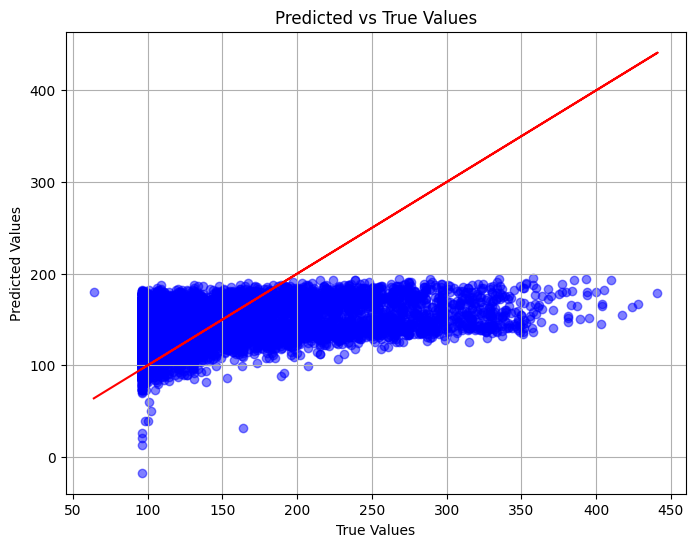

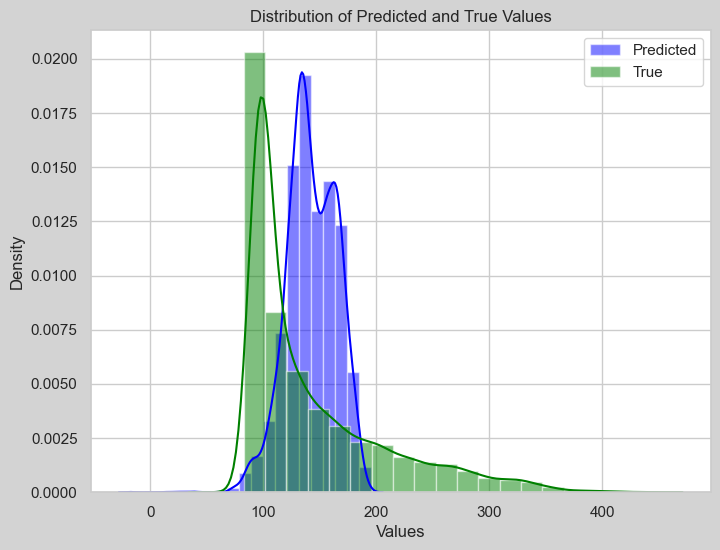

In [30]:
def plot_predictions_vs_true_values(predictionframe):
    import matplotlib.pyplot as plt
    import seaborn as sns

    y_true = predictionframe.y_true
    y_pred = predictionframe.y_pred
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot(y_true, y_true, color='red')  # Plotting the diagonal line
    plt.title('Predicted vs True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.gca().set_facecolor('white')  # Set the background color to white
    plt.show()

    # Plotting the distribution of predicted and true values
    sns.set(style="whitegrid")  
    plt.figure(figsize=(8, 6), facecolor='lightgray')  
    sns.distplot(predictionframe.y_pred, bins=20, kde=True, color='blue', label='Predicted', hist_kws={'alpha': 0.5})
    sns.distplot(predictionframe.y_true, bins=20, kde=True, color='green', label='True', hist_kws={'alpha': 0.5})
    plt.title('Distribution of Predicted and True Values')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    plt.show()

plot_predictions_vs_true_values(predictionframe)


The predictions don't make any sense, they have been capped to 200.